# 필수 라이브러리 설치

아래 라이브러리를 <u>반드시 설치</u>하고 시험을 치릅니다.<br>
**gensim** 과 **numpy**의 버전 호환성 문제로 triu from 'scipy.linag' 오류가 날 수 있으니,<br>
requirements.txt에 있는 라이브러리만 설치합니다.

- pip install -r requirements.txt

![image.png](questions/Q1.png)

In [7]:
# 이곳에 코드를 작성하시오
from konlpy.tag import Okt
import pandas as pd

tokenizer = Okt()

with open('sample_corpus_hangul.txt', encoding='utf-8') as f:
    data = f.read()
tokens = tokenizer.morphs(data.strip())
print(tokens)
print(f'전체 토큰 갯수 : {len(tokens)}')


['나랏말', '이', '중국', '과', '달라', '한자', '와', '서로', '통', '하지', '아니하므로', '\n', '우매', '한', '백성', '들', '이', '말', '하고', '싶은', '것', '이', '있어도', '마침내', '제', '뜻', '을', '잘', '표현', '하지', '못', '하는', '사람', '이', '많다', '.', '\n', '내', '이를', '딱하게', '여기어', '새로', '스물', '여덟', '자를', '만들었으니', '\n', '사람', '들', '로', '하여금', '쉬', '익히어', '날', '마다', '쓰는', '데', '편하게', '할', '뿐', '이다']
전체 토큰 갯수 : 61


![image.png](questions/Q2.png)

In [8]:
# 이곳에 코드를 작성하시오
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

model = TfidfVectorizer(
    analyzer='word',
    max_features=5
)

with open('./sample_corpus.txt','r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]

data = model.fit_transform(lines).toarray()
data = [line for line in data]

data = pd.DataFrame({'text mining':data})
print('text mining 결과')
data

UnicodeDecodeError: 'cp949' codec can't decode byte 0xeb in position 6: illegal multibyte sequence

![image.png](questions/Q3.png)

In [9]:
# 이곳에 코드를 작성하시오
from konlpy.tag import Okt
import pandas as pd

tokenizer = Okt()
data = pd.read_table('./ratings_train.txt')[-100:]

def get_tokens(row):
    pos = tokenizer.pos(row)
    tokens = []
    for token,ad in pos:
        if ad == 'Noun':
            tokens.append(token)
    return tokens
# get_tokens(data.loc[149900,'document'])

data['embedding']=data['document'].apply(lambda row: get_tokens(row))
print('토큰화 결과')
data


토큰화 결과


,id,document,label,embedding
149900,9392240,진짜엄청재미없다 무서운장면은 딱한번나오고 그3초말고는 하나도안무섭고 지루하고 끝나고...,0,"[진짜, 장면, 한번, 그, 하나, 귀신, 햇던]"
149901,10141935,"너무 짜증나서, 끝은봐야해서 2배속빨리보기했다. 안본사람 호기심이라도 같지말길. 가...",0,"[끝, 배속, 보기, 안, 사람, 호기심, 가치, 강비, 추]"
149902,9641183,설명은 줄이고 조율이 필요한 영화.,0,"[설명, 줄, 조율, 영화]"
149903,10276386,이야~~~40만 넘었내..베테랑은 9백만 넘었는데...나 협심증 걸렸다,0,"[베테, 백만, 나, 협심증]"
149904,4403898,전형적인 유치뽕짝 프랑스영화 새로운장르다 유치뽕짝,0,"[전형, 유치, 뽕짝, 프랑스, 영화, 장르, 유치, 뽕짝]"
...,...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간, 문제, 소, 죄인]"
149996,8549745,평점이 너무 낮아서...,1,[평점]
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이, 뭐, 한국인, 먹거리, 필리핀, 혼혈]"
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화, 최고봉, 방황, 날, 자화상]"


![image.png](questions/Q4.png)

In [10]:
# 이곳에 코드를 작성하시오.
from gensim.models import Word2Vec
import numpy as np

w2v_model = Word2Vec(
    data['embedding'],
    vector_size=10,
    min_count=1,
    window=5,
    sg=1
)

def get_embedding(tokens):
    embs = []
    for token in tokens:
        emb = w2v_model.wv[token]
        embs.append(emb)
    return embs

data['embedding']=data['embedding'].apply(lambda row: get_embedding(row))
print('sentence embedding 결과')
data

sentence embedding 결과


,id,document,label,embedding
149900,9392240,진짜엄청재미없다 무서운장면은 딱한번나오고 그3초말고는 하나도안무섭고 지루하고 끝나고...,0,"[[0.07557218, -0.019882103, -0.041863266, 0.06..."
149901,10141935,"너무 짜증나서, 끝은봐야해서 2배속빨리보기했다. 안본사람 호기심이라도 같지말길. 가...",0,"[[-0.07131933, 0.011671868, -0.07060782, -0.02..."
149902,9641183,설명은 줄이고 조율이 필요한 영화.,0,"[[0.056597356, 0.05424719, 0.01937596, 0.05803..."
149903,10276386,이야~~~40만 넘었내..베테랑은 9백만 넘었는데...나 협심증 걸렸다,0,"[[-0.044348698, -0.06259152, 0.09554746, -0.02..."
149904,4403898,전형적인 유치뽕짝 프랑스영화 새로운장르다 유치뽕짝,0,"[[-0.08403921, -0.015367781, -0.025305228, 0.0..."
...,...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[[0.006857192, -0.09226321, -0.09485956, -0.07..."
149996,8549745,평점이 너무 낮아서...,1,"[[-0.072861925, -0.01454594, 0.102436885, -0.0..."
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[[0.054196857, 0.081992336, -0.01440321, -0.09..."
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[[-0.051638637, -0.075929135, -0.027410807, -0..."


![image.png](questions/Q5.png)

In [11]:
# 이곳에 코드를 작성하시오
a = 'Hello world'
characters = [c for c in a]
characters = characters + [' ','2','0','2','Hello there']
print('5.1 결과')
print(characters)

d1 = {'David':25, 'Nami':20,'John':28}
d2 = {'Johnson':21,'Ethan':30}

d3 = {**d1,**d2}
print()
print('5.2 결과')
print(d3)

5.1 결과
['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', ' ', '2', '0', '2', 'Hello there']

5.2 결과
{'David': 25, 'Nami': 20, 'John': 28, 'Johnson': 21, 'Ethan': 30}


![image.png](questions/Q6.png)

In [12]:
# 이곳에 코드를 작성하시오
import numpy as np
x = np.arange(2,12,2)
print('입력:',x)
out = x*2
print('결과:',out)

입력: [ 2  4  6  8 10]
결과: [ 4  8 12 16 20]


![image.png](questions/Q7.png)

In [13]:
# 이곳에 코드를 작성하시오.
import pandas as pd

category = ['A','B','A','B']
Name = ['John','Anna','Perter','Linda']
Age = [28,34,45,32]
Income = [50000,60000,80000,75000]

data = pd.DataFrame({'category':category,'Name':Name,'Age':Age,'Income':Income})
print('Dataframe')
print(data)

print()
print('카테고리별 평균값 계산')
data.groupby('category')[['Age','Income']].mean()

Dataframe
  category    Name  Age  Income
0        A    John   28   50000
1        B    Anna   34   60000
2        A  Perter   45   80000
3        B   Linda   32   75000

카테고리별 평균값 계산


,Age,Income
category,,
A,36.5,65000.0
B,33.0,67500.0


![image.png](questions/Q8.png)

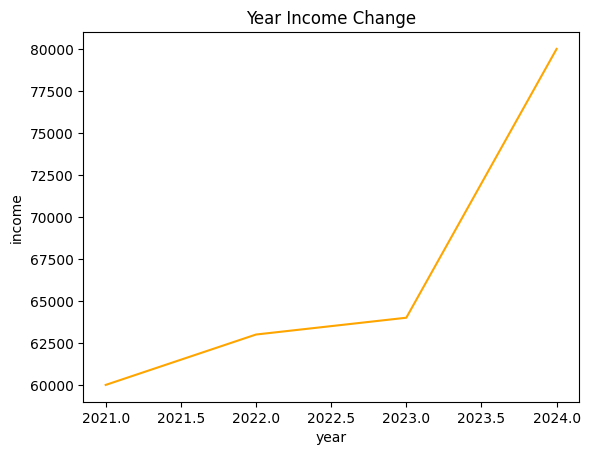

<Figure size 500x300 with 0 Axes>

In [14]:
# 이곳에 코드를 작성하시오
import matplotlib.pyplot as plt

year = [2021,2022,2023,2024]
income = [60000,63000,64000,80000]

plt.plot(year,income,color='orange')
plt.xlabel('year')
plt.ylabel('income')
plt.title('Year Income Change')
plt.figure(figsize=(5,3))
plt.show()